In [1]:
import tensorflow  as tf    
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from time import strftime
import numpy as np

2024-02-28 10:40:24.149298: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 10:40:24.188747: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 10:40:24.188802: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 10:40:24.189839: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 10:40:24.195437: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 10:40:24.195847: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:5000], y_train_full[:5000]
X_valid, y_valid = X_train_full[5000:], y_train_full[5000:]

print(X_train.shape)
print(X_train[0].max())
print(X_train[0].min())
print(X_train.dtype)

X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

(5000, 28, 28)
255
0
uint8


Text(0.5, 1.0, 'Dress')

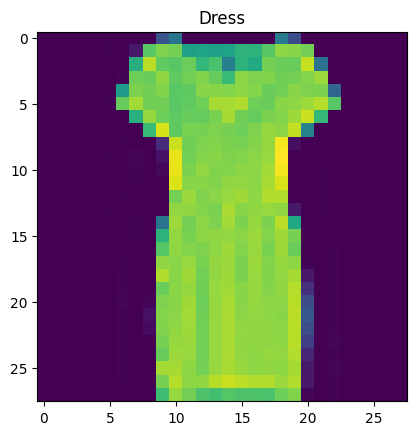

In [3]:
plt.imshow(X_train[20])
plt.title(class_names[y_train[20]])

## Model

In [4]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.input_names[0]

'input_1'

## Train

In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [11]:
!ls

my_fashion_mnist_model	my_fashion_mnist_model.ipynb


In [13]:
def get_run_logdir(root_logdir="my_fashion_mnist_model/my_logs"):
    return Path(root_logdir)/strftime("run_%Y_%M_%D_%H_%M_%S")

In [15]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(get_run_logdir(), 
                                                update_freq="epoch")
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./my_fashion_mnist_model/respaldo_model.hdf5",
                                                   save_best_only=True,
                                                   verbose=1,
                                                   period=10)

In [17]:
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb, checkpoint_cb, early_stopping_cb])

Epoch 1/100
157/157 [==============================] - 4s 21ms/step - loss: 1.4759 - accuracy: 0.5734 - val_loss: 1.0511 - val_accuracy: 0.6746
Epoch 2/100
157/157 [==============================] - 3s 19ms/step - loss: 0.8872 - accuracy: 0.7064 - val_loss: 0.8274 - val_accuracy: 0.7275
Epoch 3/100
157/157 [==============================] - 3s 19ms/step - loss: 0.7355 - accuracy: 0.7504 - val_loss: 0.7311 - val_accuracy: 0.7418
Epoch 4/100
157/157 [==============================] - 6s 35ms/step - loss: 0.6582 - accuracy: 0.7856 - val_loss: 0.6851 - val_accuracy: 0.7640
Epoch 5/100
157/157 [==============================] - 3s 20ms/step - loss: 0.6105 - accuracy: 0.7970 - val_loss: 0.6918 - val_accuracy: 0.7648
Epoch 6/100
157/157 [==============================] - 3s 19ms/step - loss: 0.5794 - accuracy: 0.8128 - val_loss: 0.6015 - val_accuracy: 0.7917
Epoch 7/100
157/157 [==============================] - 3s 18ms/step - loss: 0.5528 - accuracy: 0.8222 - val_loss: 0.5936 - val_accuracy:

/home/galois/Documents/galois2024/docker-flask-mongoDB-TFserving/.env/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 3s 19ms/step - loss: 0.4737 - accuracy: 0.8444 - val_loss: 0.5483 - val_accuracy: 0.8100
Epoch 12/100
157/157 [==============================] - 3s 19ms/step - loss: 0.4638 - accuracy: 0.8510 - val_loss: 0.5634 - val_accuracy: 0.8091
Epoch 13/100
157/157 [==============================] - 3s 19ms/step - loss: 0.4553 - accuracy: 0.8494 - val_loss: 0.5352 - val_accuracy: 0.8192
Epoch 14/100
157/157 [==============================] - 3s 19ms/step - loss: 0.4408 - accuracy: 0.8508 - val_loss: 0.5576 - val_accuracy: 0.7985
Epoch 15/100
157/157 [==============================] - 3s 19ms/step - loss: 0.4266 - accuracy: 0.8594 - val_loss: 0.5787 - val_accuracy: 0.7941
Epoch 16/100
157/157 [==============================] - 3s 19ms/step - loss: 0.4270 - accuracy: 0.8560 - val_loss: 0.5315 - val_accuracy: 0.8184
Epoch 17/100
157/157 [==============================] - 3s 19ms/step - loss: 0.4155 - accuracy: 0.8602 - val_loss: 0.5060 - val_accuracy: 0.826

## Save

In [5]:
model_name = "my_fashion_mnist_model/versions"
model_version = "0001"
model_path = Path(model_name) / model_version

In [21]:
model.save(model_path, save_format="tf")

INFO:tensorflow:Assets written to: my_fashion_mnist_model/versions/0001/assets


INFO:tensorflow:Assets written to: my_fashion_mnist_model/versions/0001/assets


In [6]:
!saved_model_cli show --dir "./my_fashion_mnist_model/versions/0001"

2024-02-28 10:42:12.185439: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 10:42:12.232790: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 10:42:12.232843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 10:42:12.233876: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 10:42:12.240536: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 10:42:12.240727: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [7]:
!saved_model_cli show --dir "./my_fashion_mnist_model/versions/0001" --tag_set serve

2024-02-28 10:42:46.550225: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 10:42:46.596811: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 10:42:46.596858: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 10:42:46.598700: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 10:42:46.605345: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 10:42:46.605536: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [8]:
!saved_model_cli show --dir "./my_fashion_mnist_model/versions/0001" --tag_set serve --signature_def serving_default

2024-02-28 10:44:17.486277: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 10:44:17.525085: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 10:44:17.525122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 10:44:17.525980: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 10:44:17.531477: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-28 10:44:17.531644: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Test connection to TensorFlow serving

In [9]:
from tensorflow_serving.apis.predict_pb2 import PredictRequest
import grpc
from tensorflow_serving.apis import prediction_service_pb2_grpc

In [25]:
X_new.shape

(28, 28)

In [48]:
X_new = X_test[1].astype(np.float64)
y_new = y_test[1]

request = PredictRequest()
request.model_spec.name = "my_mnist_model"
request.model_spec.signature_name = "serving_default"
input_name = "input_1"
request.inputs[input_name].CopyFrom(tf.make_tensor_proto(X_new.tolist()))

In [49]:
channel = grpc.insecure_channel("localhost:8500")
predict_service = prediction_service_pb2_grpc.PredictionServiceStub(channel)
response = predict_service.Predict(request, timeout=10.0)

In [50]:
output_name = "dense_2"
output_proto = response.outputs[output_name]
y_proba = tf.make_ndarray(output_proto)

In [51]:
y_proba[0]

array([2.10805520e-05, 1.18235036e-07, 9.86473560e-01, 3.55332486e-06,
       2.76635890e-03, 1.73241033e-09, 1.07340086e-02, 1.79284018e-11,
       1.46117588e-06, 2.57127941e-09], dtype=float32)

[]

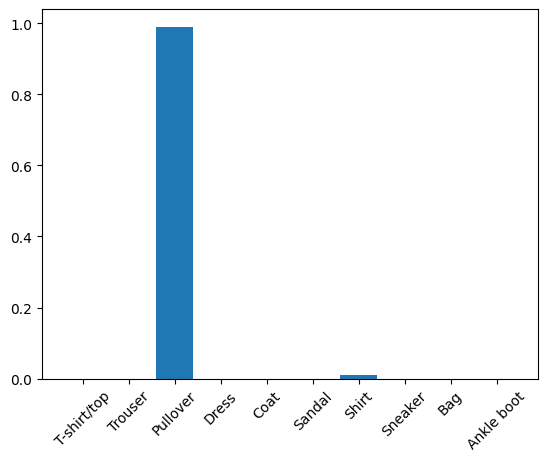

In [52]:
plt.bar(class_names,y_proba[0].round(2))
plt.xticks(rotation=45)
plt.plot()

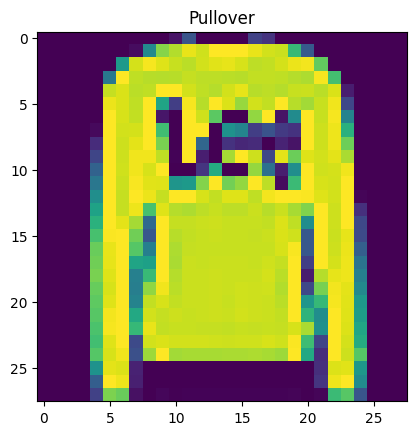

In [53]:
plt.imshow(X_new)
plt.title(class_names[y_new])
plt.show()

## Save img with PIL

#### To save right, need to invert

In [ ]:
from PIL import Image, ImageOps

In [88]:
dumi = X_new*255
im = Image.fromarray(dumi.astype('uint8'))
im_invert = ImageOps.invert(im)
im_invert.save("Pullover.png")

#### When load, need to invert too

In [95]:
img = Image.open("./Pullover.png")
img = ImageOps.invert(img)

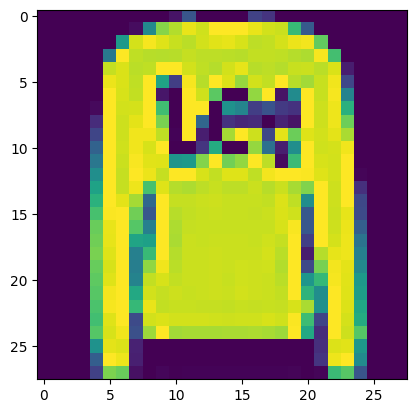

In [96]:
img = np.array(img)
img = img/255.
plt.imshow(img)